<a href="https://colab.research.google.com/github/MathiasLater/efc2/blob/main/EFC2_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.   Classificação multi-classe

Neste exercício, o intuito é realizar a classificação do tipo de atividade humana desenvolvida com base em dados do acelerômetro e do giroscópio do celular.

Para a solução deste problema, utilizamos a abordagem Softmax, treinando um modelo que gera como saída valores de probabilidade para todos os rótulos possíveis. Usamos a biblioteca sci-kit learn para treinar o modelo e para realizar as predições e, em seguida, geramos a matriz de confusão e calculamos a F1-medida média de todas as classes.

Acurácia:  0.9613034623217923


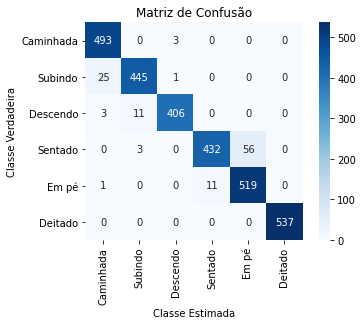

<Figure size 1080x864 with 0 Axes>


Tempo de treinamento:  46.017791986465454

Tempo de predição:  0.008282184600830078

F1-medida:  0.9613034623217923

F1-medida macro:  0.9612398379770212


In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import time
import sklearn
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

X_train = pd.read_csv("X_train.txt", delim_whitespace=True)
y_train = pd.read_csv("y_train.txt")

X_test = pd.read_csv("X_test.txt", delim_whitespace=True)
y_test = pd.read_csv("y_test.txt")

# Solução do problema usando Softmax

# Cria e treina o modelo multi-classes de regressão logística a partir dos conjuntos de treinamento
start_t = time.time()
softmax = LogisticRegression(multi_class='multinomial',max_iter=3000)
softmax.fit(X_train, y_train.values.ravel())
end_t = time.time()

softmax_accuracy = softmax.score(X_test, y_test)
print ("Acurácia: ", softmax_accuracy)


# Realiza as predições das classes de cada grupo de padrões do conjunto de dados de teste
start1 = time.time()
y_pred = softmax.predict(X_test)
end1 = time.time()

# Plota a matriz de confusão
conf_matrix = metrics.confusion_matrix(y_test, y_pred) 
cm = sn.heatmap(conf_matrix, fmt='.0f', square=True, annot=True, cmap="Blues",
                xticklabels=('Caminhada','Subindo','Descendo','Sentado','Em pé','Deitado'),
                yticklabels=('Caminhada','Subindo','Descendo','Sentado','Em pé','Deitado'))

plt.xlabel('Classe Estimada')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.figure(figsize=(15,12))
plt.show()

print("\nTempo de treinamento: ", end_t - start_t)
print("\nTempo de predição: ", end1 - start1)

softmax_fscore = f1_score(y_test, y_pred, average='micro')
print("\nF1-medida: ",softmax_fscore)

softmax_fscore_macro = f1_score(y_test, y_pred, average='macro')
print("\nF1-medida macro: ",softmax_fscore_macro)

A matriz de confusão gerada mostra que o modelo obteve um bom resultado, acertando 96,13% das amostras classificadas no conjunto de teste. Percebemos algo que podemos relacionar com uma interpretação física do problema, que é o fato de que na maior parte que o modelo cometeu erros foi para amostras de classe cujos dados brutos realmente se assemelhariam. Dados de aceleração, tanto no domínio do tempo quanto no da frequência, de uma pessoa sentada e de uma pessoa em pé, ambos os casos em que a pessoa estaria parada, acabaram sendo confundidos. O mesmo ocorreu para amostras de pessoas subindo e descendo escadas, situações em que, novamente, dados medidos por um acelerômetro seriam parecidos.

Inicialmente, usamos a acurácia como métrica para avaliar o nosso modelo, para termos uma avaliação abrangente, ou seja, considerando o desempenho do modelo como um todo, para todas as classes. Na classificação binária, ao usarmos a F1-medida, estamos mais focados nos resultados com base na classe representada pelo valor 1, ao levarmos em conta o recall e a precisão. Porém, no caso multi-classe, ao calcularmos a F1-medida média, vemos que é o mesmo valor da acurácia, o que faz sentido, pois estamos sendo abrangentes em ambos os casos. Com a acurácia já obtemos a quantidade de acertos sobre o total de amostras, sem nos preocuparmos com a classe. á com a F1-medida média, nos preocupamos a cada vez com uma classe, mas realizamos a média ao final.

Ficamos interessados também em observar a eficiência do modelo com relação ao tempo de execução. Vimos que para treinar o modelo leva um tempo razoável (45 segundos neste exemplo). Contudo, uma vez criado o modelo, a predição do conjunto de teste leva um tempo ínfimo para ser realizada (menos de um centésimo de segundo).

Acurácia:  0.9073319755600815


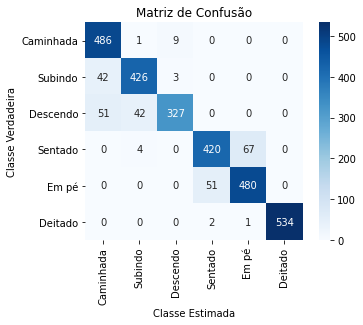

<Figure size 1080x864 with 0 Axes>


Tempo de predição:  18.589195728302002

F1-medida:  0.9073319755600814

F1-medida macro:  0.9044448949239351


In [8]:
# Solução do problema usando k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

# Loop para definir melhor valor de k entre 0 e 20

# best_accuracy = 0
# best_k = 1
# for k in range(1,21):
#   start_l = time.time()
#   knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train.values.ravel())   
#   # accuracy on X_test 
#   accuracy = knn.score(X_test, y_test)
#   if accuracy > best_accuracy:
#     best_accuracy = accuracy
#     best_k = k
#   print("K atual: ",k,"com acurácia de: ",accuracy)
#   end_l = time.time()
#   print("Tempo para execução de k=",k,": ",end_l - start_l)

knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train.values.ravel())
accuracy = knn.score(X_test, y_test)
print ("Acurácia: ", accuracy)
  
# Plota a matriz de confusão
start = time.time()
knn_predictions = knn.predict(X_test) 
end = time.time() 
conf_matrix = metrics.confusion_matrix(y_test, knn_predictions) 
cm = sn.heatmap(conf_matrix, fmt='.0f', square=True, annot=True, cmap="Blues",
                xticklabels=('Caminhada','Subindo','Descendo','Sentado','Em pé','Deitado'),
                yticklabels=('Caminhada','Subindo','Descendo','Sentado','Em pé','Deitado'))

plt.xlabel('Classe Estimada')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.figure(figsize=(15,12))
plt.show()

print("\nTempo de predição: ", end - start)

knn_fscore = f1_score(y_test, knn_predictions, average='micro')
print("\nF1-medida: ",knn_fscore)

knn_fscore_macro = f1_score(y_test, knn_predictions, average='macro')
print("\nF1-medida macro: ",knn_fscore_macro)

A fim de estudar o uso do modelo KNN, realizamos uma etapa inicial para a escolha da melhor quantidade de vizinhos que seria considerada no modelo. A partir de um laço de repetição, testamos diferentes valores de k de 1 a 20. Percebemos que, com excessão dos primeiros (que também não obtiveram resultados ruins, de 86% a 89%), a partir de k=4, todos os valores de k mantiveram uma acurácia de 90% aproximadamente.

De todo modo, aquele que se saiu melhor foi k=8, para o qual a acurácia foi de 90,73%. A F1-medida resultou novamente no mesmo valor.

Quando comparamos essa métrica com a obtida com o modelo de regressão logística Softmax, percebemos a limitação do modelo KNN. Por não se tratar de um modelo treinado, e sim de um cálculo a força bruta dos pontos com menor distância, acabamos não tendo boas fronteiras de decisão e acabamos por ter maiores erros, principalmente entre as classes em que os dados se aproximam.

Aqui, novamente, nos interessamos pelos tempos de execução do código. O tempo de treinamento é nulo, pois não existe etapa de treinamento, de ajuste de parâmetros. Neste quesito, e no de complexidade matemática do modelo, o KNN mostra vantagens, já que consiste na comparação pura e simples das amostras de teste com todas as disponíveis no conjunto de treinamento.

A desvantagem se mostra no momento da predição. Por necessitar comparar cada amostra a ser classificada com todas as presentes no conjunto de treinamento, a execução é bastante lenta. Para o conjunto de treinamento em questão, o algoritmo levou mais de 18 segundos para realizar a predição (contra um tempo de execução menor que um centésimo de segundo com o modelo Softmax).
